# Prediction using Supervised Machine Learning `->` `Linear Regression`

### 1. Importing Necessary Dependancies
- `Pandas`
- `Numpy`
- `ScikitLearn`
- `Matplotlib`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

### 2. Importing Dataset

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Dataset Imported Successfully')
df.head(10)

Dataset Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3. Exploratory Data Analysis
- Info about the Dataset
- Descriptive Statistics of Dataset
- Data Visualisation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


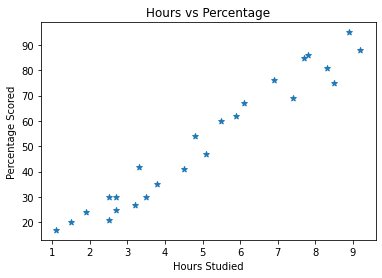

In [5]:
plt.scatter(df['Hours'], df['Scores'], marker='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

### 4. Preparing Data for Predictions

In [6]:
X = df['Hours'].values
y = df['Scores'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20,), (5,), (20,), (5,))

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [10]:
reg.fit(X_train.reshape(-1, 1), y_train)
print('Training Complete')

Training Complete


### 5. Calculating the `Best` fit Line

In [11]:
L = reg.coef_*X + reg.intercept_

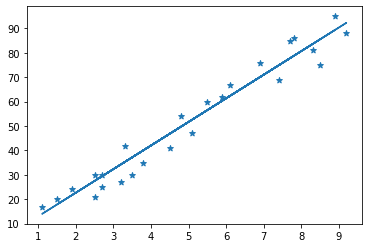

In [12]:
plt.scatter(df['Hours'], df['Scores'], marker='*')
plt.plot(X, L)
plt.show()

### 6. Making Predictions

In [13]:
y_pred = reg.predict(X_test.reshape(-1, 1))
y_pred

array([74.90959672, 70.0740592 , 46.86347911, 37.19240407, 62.33719917])

In [14]:
df1 = pd.DataFrame(y_test, columns=['Testing Data'])
df1

,Testing Data
0,69
1,76
2,41
3,30
4,67


In [15]:
# Comparing the predicted and actual values
df1['Predicted Data'] = y_pred
df1

,Testing Data,Predicted Data
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


In [16]:
def predict(hours):
    """
    Function to predict the Scores based on the Number of Hours
    hours -> Int
    return type -> Null
    """
    hours = np.array(hours)
    pred = reg.predict(hours.reshape(-1, 1))
    print(f'No. of Hours = {hours}')
    print(f'Predicted Percentage = {pred[0]}')

In [17]:
predict(9.25)

No. of Hours = 9.25
Predicted Percentage = 92.80108554200024


### 7. Evaluating the Model
#### Metrics used are:
- Root Mean Square Error (`RMSE`)
- R2 Score (`R2`)

In [18]:
# Model Evaluation for the Training Set
predicted_y_train = reg.predict(X_train.reshape(-1, 1))
rmse = (np.sqrt(mean_squared_error(y_train, predicted_y_train)))
r2 = r2_score(y_train, predicted_y_train)
print('The Model\'s training set performance :-')
print(f'RMSE is : {rmse}')
print(f'R2 Score is : {r2}')
print("-"*100)


# Model Evaluation for the Training Set
predicted_y_test = reg.predict(X_test.reshape(-1, 1))
rmse = (np.sqrt(mean_squared_error(y_test, predicted_y_test)))
r2 = r2_score(y_test, predicted_y_test)
print('The Model\'s testing set performance :-')
print(f'RMSE is : {rmse}')
print(f'R2 Score is : {r2}')
print("-"*100)

The Model's training set performance :-
RMSE is : 5.237654853864423
R2 Score is : 0.9596371297881153
----------------------------------------------------------------------------------------------------
The Model's testing set performance :-
RMSE is : 5.964778000255339
R2 Score is : 0.8880613623447959
----------------------------------------------------------------------------------------------------
